<a href="https://colab.research.google.com/github/shivani257/numpy/blob/main/Weather_prediction_(NaiveBayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Weather Prediction**(Naive Bayes-Gussian)

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read the dataset using pandas csv()
# print first five rows
df = pd.read_csv('/content/seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
#lets see their columns and their data types, for this we will use info() method.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
# the shape of the data using the shape.
df.shape

(1461, 6)

In [ ]:
# lets check if there are any missing values in dataset or not.
#there is not missing values in the dataset
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
df[df['temp_min']==min(df.temp_min)]

,date,precipitation,temp_max,temp_min,wind,weather
706,2013-12-07,0.0,0.0,-7.1,3.1,sun


In [ ]:
df[df['temp_max']==max(df.temp_max)]

,date,precipitation,temp_max,temp_min,wind,weather
953,2014-08-11,0.5,35.6,17.8,2.6,rain


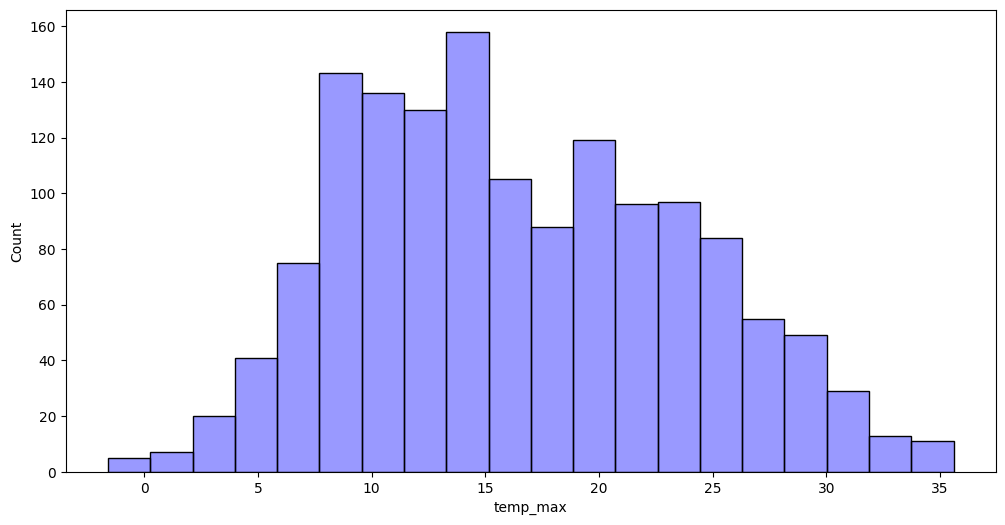

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x=df.temp_max,bins=20,color='blue',alpha=0.4)
plt.show()

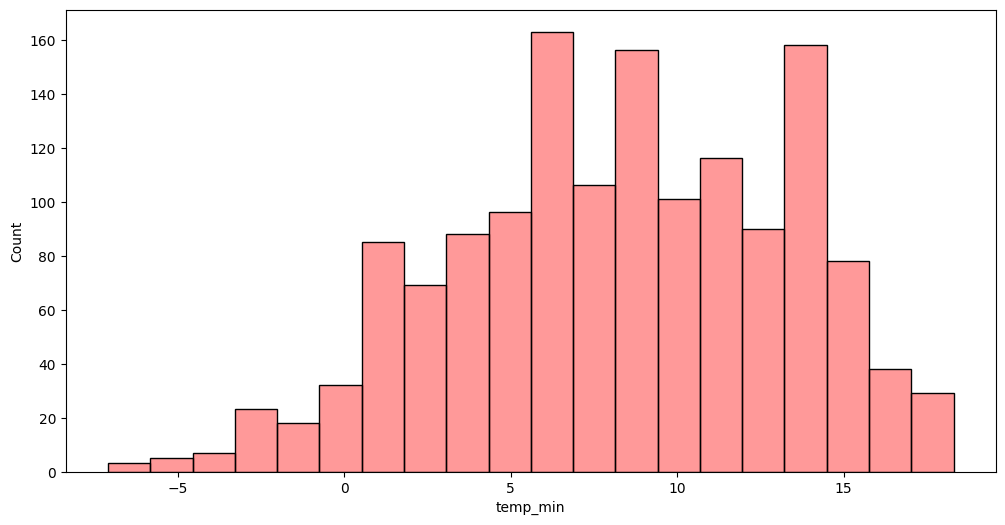

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_min,bins=20,color='red',alpha=0.4)
plt.show()

In [ ]:
# to_datetime: convert different data types into datetime objects
df.loc[:,['date','temp_max']]
df['date'] = pd.to_datetime(df['date'])

# **Max temperature in each month in each year**

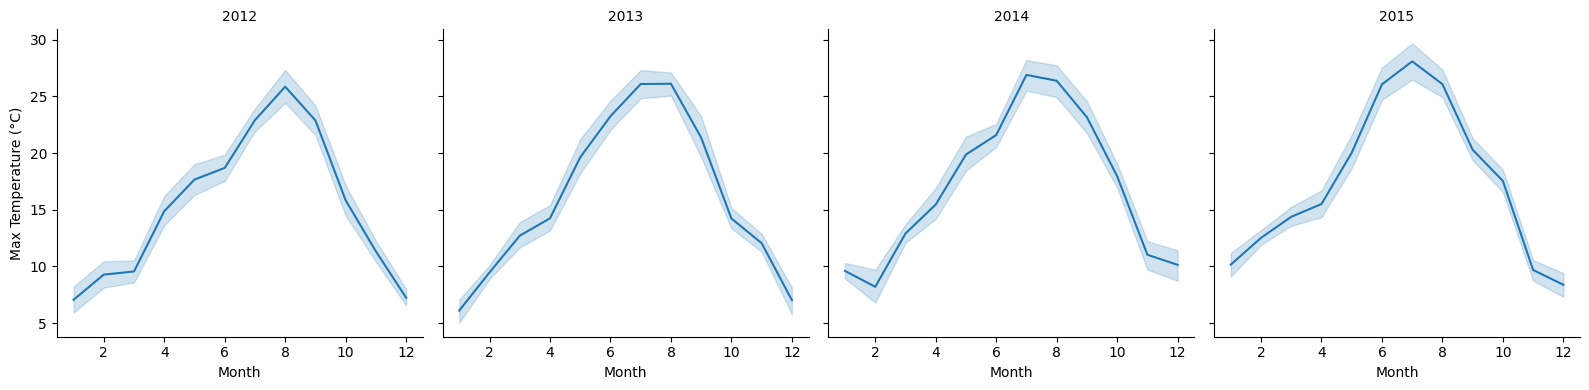

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_max')
g.set_axis_labels('Month', 'Max Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

# **Min temperature in each month in each year**

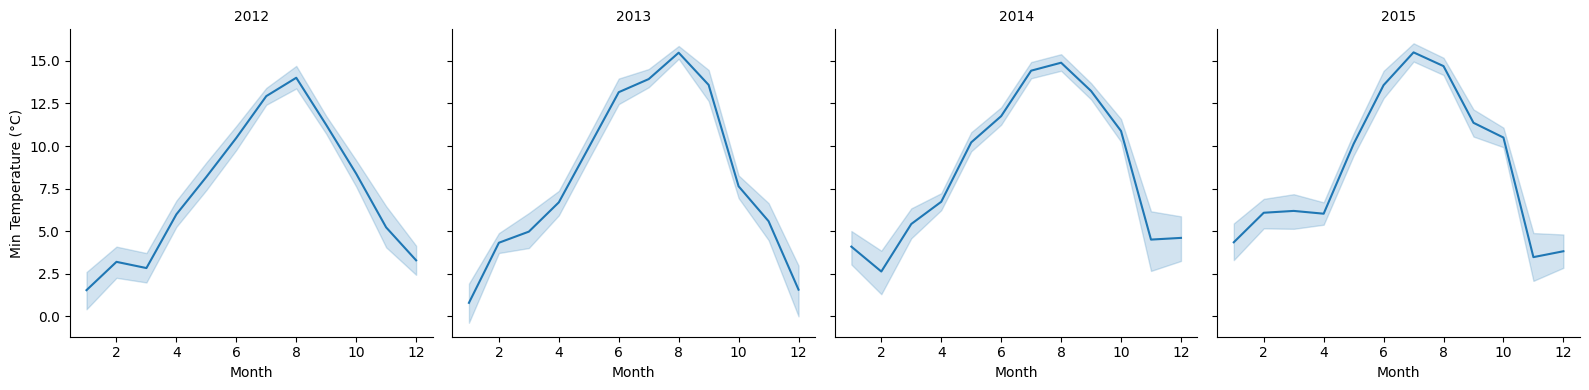

In [ ]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_min')
g.set_axis_labels('Month', 'Min Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

In [ ]:
df.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

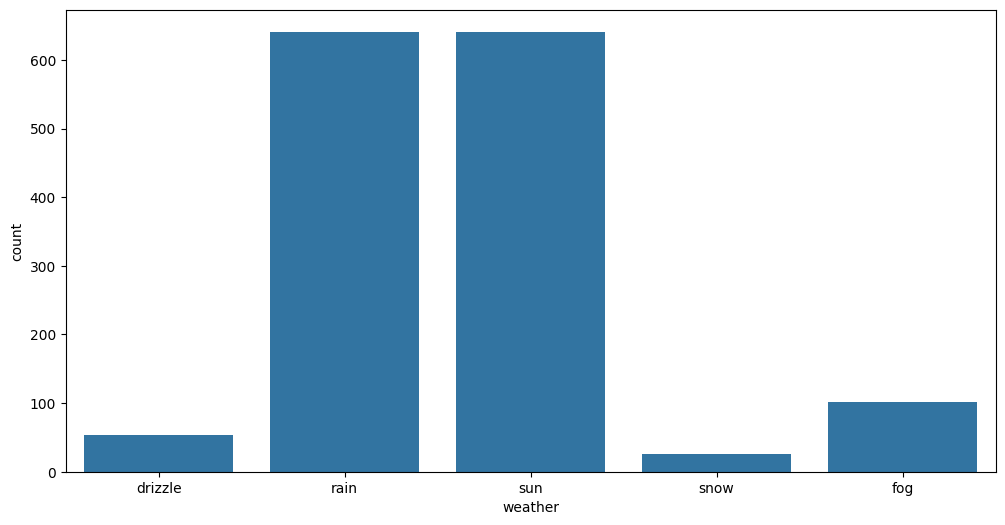

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x=df.weather)
plt.show()

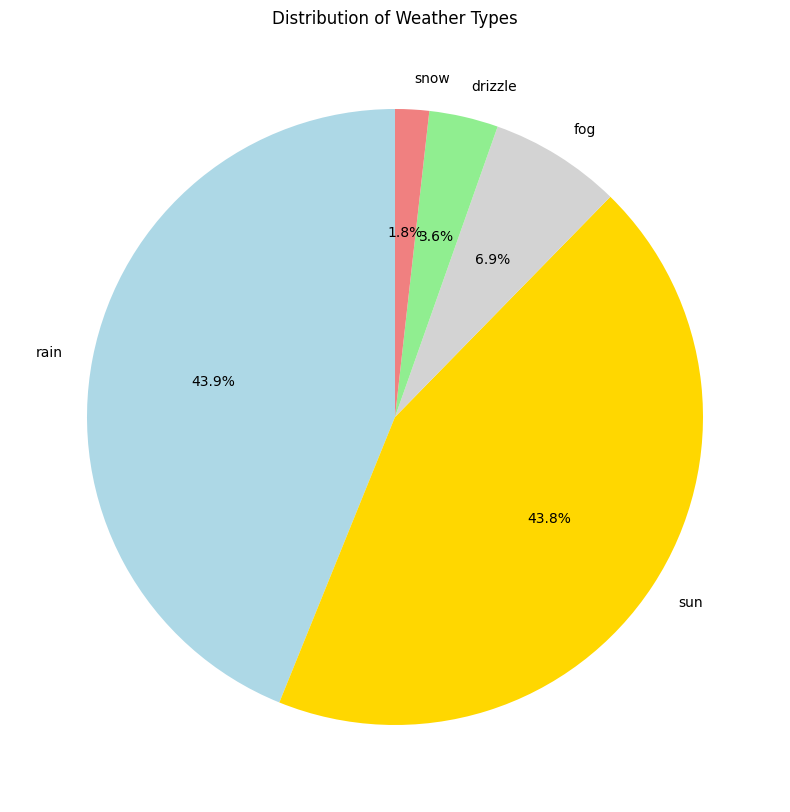

In [ ]:
x=df.weather.value_counts()
plt.figure(figsize=(12, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold', 'lightgray', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Weather Types')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder


In [ ]:
# X is an independent variable
# y is a dependent variable
x = df[['temp_min', 'temp_max', 'precipitation','wind']]
y = df['weather']


In [ ]:
x


,temp_min,temp_max,precipitation,wind
0,5.0,12.8,0.0,4.7
1,2.8,10.6,10.9,4.5
2,7.2,11.7,0.8,2.3
3,5.6,12.2,20.3,4.7
4,2.8,8.9,1.3,6.1
...,...,...,...,...
1456,1.7,4.4,8.6,2.9
1457,1.7,5.0,1.5,1.3
1458,0.6,7.2,0.0,2.6
1459,-1.0,5.6,0.0,3.4


In [ ]:
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [ ]:
#now we want to split dataset into training and testting
X_train,X_test,y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
len(X_train)

1168

In [ ]:
len(X_test)

293

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
X_test

,temp_min,temp_max,precipitation,wind
752,5.6,9.4,0.5,2.6
286,12.2,15.6,4.8,3.9
168,11.7,18.9,0.0,6.4
534,13.3,23.3,0.3,3.4
14,-3.3,1.1,5.3,3.2
...,...,...,...,...
905,14.4,24.4,0.0,2.5
482,10.6,13.9,0.0,5.9
1168,9.4,13.9,17.0,3.8
1278,17.8,33.9,0.0,3.4


In [ ]:
model.score(X_test,y_test)

0.8600682593856656